# Домашнее задание 1.

In [39]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

#### Описание данных

В папке Data находится информация о студентах. Всего 10 групп студентов. Файлы делятся на две категории:
    * Students_info_i - информация о студентах из группы i
    * Students_marks_i - оценки студентов из группы i за экзамены

### Одно из важных достоинств pandas $-$ это удобные методы реляционного взаимодействия с данными, аналогичные, например, возможностям SQL для слияния и конкатенации таблиц: merge, join, concat. Наличие готовых методов позволяет не реализовывать самостоятельно поэлементную обработку данных и оперировать сразу целыми таблицами данных.

Подробно об этих методах посмотрите тут: https://www.kaggle.com/residentmario/renaming-and-combining#Combining

#### Задание 1. Соберите всю информацию о студентах в одну таблицу df. В получившейся таблице должна быть информация и оценки всех студентов из всех групп. Напечатайте несколько строк таблицы для демонстрации результата.

In [58]:
df = pd.DataFrame()

for i in range(10):
    temp_df = pd.merge(pd.read_csv("Data\Students_info_"+  str(i) + '.csv'), 
                       pd.read_csv('Data\Students_marks_' + str(i) + '.csv'))
    
    df = pd.concat([df, temp_df],ignore_index=True)
    
    
df.head()


,index,gender,race/ethnicity,parental level of education,lunch,test preparation course,group,math score,reading score,writing score
0,0,female,group B,bachelor's degree,standard,none,group1,72,72,74
1,1,female,group C,some college,standard,completed,group1,69,90,88
2,2,female,group B,master's degree,standard,none,group1,90,95,93
3,3,male,group A,associate's degree,free/reduced,none,group1,47,57,44
4,4,male,group C,some college,standard,none,group1,76,78,75


In [59]:
df

,index,gender,race/ethnicity,parental level of education,lunch,test preparation course,group,math score,reading score,writing score
0,0,female,group B,bachelor's degree,standard,none,group1,72,72,74
1,1,female,group C,some college,standard,completed,group1,69,90,88
2,2,female,group B,master's degree,standard,none,group1,90,95,93
3,3,male,group A,associate's degree,free/reduced,none,group1,47,57,44
4,4,male,group C,some college,standard,none,group1,76,78,75
...,...,...,...,...,...,...,...,...,...,...
995,995,female,group E,master's degree,standard,completed,group10,88,99,95
996,996,male,group C,high school,free/reduced,none,group10,62,55,55
997,997,female,group C,high school,free/reduced,completed,group10,59,71,65
998,998,female,group D,some college,standard,completed,group10,68,78,77


#### Задание 2. Удалите столбец index у полученной таблицы. Напечатайте первые 10 строк таблицы.

In [60]:
df.drop(['index'],axis=1, inplace=True)


In [61]:
df.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,group,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,group1,72,72,74
1,female,group C,some college,standard,completed,group1,69,90,88
2,female,group B,master's degree,standard,none,group1,90,95,93
3,male,group A,associate's degree,free/reduced,none,group1,47,57,44
4,male,group C,some college,standard,none,group1,76,78,75
5,female,group B,associate's degree,standard,none,group1,71,83,78
6,female,group B,some college,standard,completed,group1,88,95,92
7,male,group B,some college,free/reduced,none,group1,40,43,39
8,male,group D,high school,free/reduced,completed,group1,64,64,67
9,female,group B,high school,free/reduced,none,group1,38,60,50


#### Задание 3. Выведите на экран размеры полученной таблицы

In [62]:
df.shape

(1000, 9)

#### Задание 4. Выведите на экран статистические характеристики числовых столбцов таблицы (минимум, максимум, среднее значение, стандартное отклонение)

In [63]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


#### Задание 5. Проверьте, есть ли в таблице пропущенные значения

In [64]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   group                        1000 non-null   object
 6   math score                   1000 non-null   int64 
 7   reading score                1000 non-null   int64 
 8   writing score                1000 non-null   int64 
dtypes: int64(3), object(6)
memory usage: 70.4+ KB


#### Задание 6. Выведите на экран средние баллы студентов по каждому предмету (math, reading, writing)

In [68]:
print("Средняя по математике: :", df["math score"].mean())
print("Средняя по чтению: ", df["reading score"].mean())
print("Средняя по письму: ", df["writing score"].mean())

Средняя по математике: : 66.089
Средняя по чтению:  69.169
Средняя по письму:  68.054


#### Задание 7. Как зависят оценки от того, проходил ли студент курс для подготовки к сдаче экзамена (test preparation course)? Выведите на экран для каждого предмета в отдельности средний балл студентов, проходивших курс для подготовки к экзамену и не проходивших курс.

In [76]:
math_course = df.groupby("test preparation course")["math score"].mean()
print("Математика\n", math_course)

Математика
 test preparation course
completed    69.695531
none         64.077882
Name: math score, dtype: float64


In [78]:
reading_course = df.groupby("test preparation course")["reading score"].mean()
print("Чтение\n", reading_course)

Чтение
 test preparation course
completed    73.893855
none         66.534268
Name: reading score, dtype: float64


In [79]:
writing_course = df.groupby("test preparation course")["writing score"].mean()
print("Письмо\n", writing_course)

Письмо
 test preparation course
completed    74.418994
none         64.504673
Name: writing score, dtype: float64


#### Задание 8. Выведите на экран все различные значения из столбца lunch.

In [66]:
df["lunch"].unique()

array(['standard', 'free/reduced'], dtype=object)

#### Задание 9. Переименуйте колонку "parental level of education" в "education", а "test preparation course" в "test preparation" с помощью метода pandas rename
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rename.html

In [82]:
df.rename(columns={"parental level of education" : "education", 
                   "test preparation course": "test preparation"}, inplace=True)
df

,gender,race/ethnicity,education,lunch,test preparation,group,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,group1,72,72,74
1,female,group C,some college,standard,completed,group1,69,90,88
2,female,group B,master's degree,standard,none,group1,90,95,93
3,male,group A,associate's degree,free/reduced,none,group1,47,57,44
4,male,group C,some college,standard,none,group1,76,78,75
...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,group10,88,99,95
996,male,group C,high school,free/reduced,none,group10,62,55,55
997,female,group C,high school,free/reduced,completed,group10,59,71,65
998,female,group D,some college,standard,completed,group10,68,78,77


**Зафиксируем минимальный балл для сдачи экзамена**

In [84]:
passmark = 51

#### Задание 10. Ответьте на вопросы:
* Какая доля студентов сдала экзамен по математике (passmark > 50)?
* Какая доля студентов, проходивших курс подготовки к экзамену, сдала экзамен по математике?
* Какая доля женщин, не проходивших курс подготовки к экзамену, не сдала экзамен по математике? 

In [127]:
print(df["math score"].apply(lambda x: x >= passmark).mean())
print(df[df["test preparation"] == 'completed']["math score"].apply(lambda x: x >= passmark).mean())
print(df[(df["test preparation"] == "none") & (df["gender"] == "female")]["math score"].apply(lambda x: x <= passmark).mean())

0.85
0.9078212290502793
0.24850299401197604


#### Задание 11. С помощью groupby выполните задания ниже.
* Для каждой этнической группы выведите средний балл за экзамен по чтению
* Для каждого уровня образования выведите минимальный балл за экзамен по письму

In [102]:
print(df.groupby("race/ethnicity")["reading score"].mean())

race/ethnicity
group A    64.674157
group B    67.352632
group C    69.103448
group D    70.030534
group E    73.028571
Name: reading score, dtype: float64


In [103]:
print(df.groupby("education")["writing score"].min())

education
associate's degree    35
bachelor's degree     38
high school           15
master's degree       46
some college          19
some high school      10
Name: writing score, dtype: int64


#### Задание 12. Выведите на экран средние баллы студентов по каждому предмету в зависимости от пола и уровня образования. То есть должно получиться количество групп, равных 2 * (число уровней образования), и для каждой такой группы выыведите средний балл по каждому из предметов.

Это можно сделать с помощью сводных таблиц (pivot_table):

https://www.kaggle.com/kamilpolak/tutorial-how-to-use-pivot-table-in-pandas
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.pivot_table.html#pandas.DataFrame.pivot_table

In [107]:
pd.pivot_table(df, index=["gender", "education"], values=["math score", "reading score", "writing score"], aggfunc="mean")

math score  reading score  writing score
gender education                                                   
female associate's degree   65.250000      74.120690      74.000000
       bachelor's degree    68.349206      77.285714      78.380952
       high school          59.351064      68.202128      66.691489
       master's degree      66.500000      76.805556      77.638889
       some college         65.406780      73.550847      74.050847
       some high school     59.296703      69.109890      68.285714
male   associate's degree   70.764151      67.433962      65.405660
       bachelor's degree    70.581818      68.090909      67.654545
       high school          64.705882      61.480392      58.539216
       master's degree      74.826087      73.130435      72.608696
       some college         69.009259      64.990741      63.148148
       some high school     67.840909      64.693182      61.375000

In [104]:
df.head()

,gender,race/ethnicity,education,lunch,test preparation,group,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,group1,72,72,74
1,female,group C,some college,standard,completed,group1,69,90,88
2,female,group B,master's degree,standard,none,group1,90,95,93
3,male,group A,associate's degree,free/reduced,none,group1,47,57,44
4,male,group C,some college,standard,none,group1,76,78,75


#### Задание 13. Постройте диаграмму зависимоти пола от среднего балла по математике и уровня образования. 

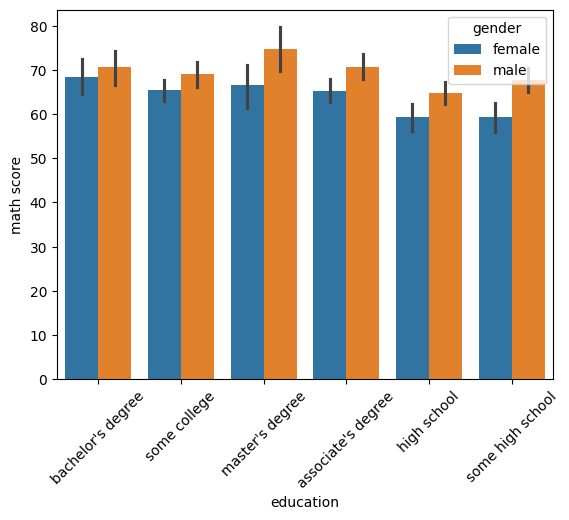

In [112]:
sns.barplot(df, x="education", y="math score", hue= "gender")
plt.xticks(rotation=45)
plt.show()

#### Задание 14. Сколько студентов успешно сдали экзамен по математике?

Создайте новый столбец в таблице df под названием "Math Status" и запишите в него F, если студент не сдал экзамен по математике (балл за экзамен < passmark), и P иначе.

Посчитайте количество студентов, сдавших и не сдавших экзамен по математике.

Сделайте аналогичные шаги для экзаменов по чтению и письму.

In [115]:
df["Math Status"] = df["math score"].apply(lambda x: "F" if x < passmark else "P")
print(df["Math Status"].value_counts())

Math Status
P    850
F    150
Name: count, dtype: int64


In [116]:
df["Reading Status"] = df["reading score"].apply(lambda x: "F" if x < passmark else "P")
print(df["Reading Status"].value_counts())

Reading Status
P    903
F     97
Name: count, dtype: int64


In [118]:
df["Writing Status"] = df["writing score"].apply(lambda x: "F" if x < passmark else "P")
print(df["Writing Status"].value_counts())

Writing Status
P    876
F    124
Name: count, dtype: int64


#### Задание 15. Сколько студентов успешно сдали все экзамены?

Создайте столбец OverAll_Pass и запишите в него для каждого студента 'F', если студент не сдал хотя бы один из трех экзаменов, а иначе 'P'.

Посчитайте количество студентов, которые сдали все экзамены.

In [128]:
df["OverAll_Pass"] = df.apply(lambda x: "P" if x["Math Status"] == "P" and 
                              x["Reading Status"] == "P" and
                              x["Writing Status"] == "P" else "F", axis=1)

df.head()

,gender,race/ethnicity,education,lunch,test preparation,group,math score,reading score,writing score,Math Status,Reading Status,Writing Status,OverAll_Pass
0,female,group B,bachelor's degree,standard,none,group1,72,72,74,P,P,P,P
1,female,group C,some college,standard,completed,group1,69,90,88,P,P,P,P
2,female,group B,master's degree,standard,none,group1,90,95,93,P,P,P,P
3,male,group A,associate's degree,free/reduced,none,group1,47,57,44,F,P,F,F
4,male,group C,some college,standard,none,group1,76,78,75,P,P,P,P


#### Задание 16. Переведем баллы в оценки

### Система перевода баллов в оценки
* больше 91 = A
* 81-90 = B
* 71-80 = C
* 61-70 = D
* 51-60 = E
* меньше 50 = F (Fail)

Создайте вспомогательную функцию, которая будет по среднему баллу за три экзамена выставлять оценку студенту по данным выше критериям.

Создайте столбец Grade и запишите в него оценку каждого студента.

Выведите количество студентов, получивших каждую из оценок. Результат отсортируйте по оценке (A, B, C, D, E, F).

In [137]:
def grade(x):
    if x >= 91:
        return "A"
    elif x >= 81 and x <= 90:
        return "B"
    elif x >= 71 and x <= 80:
        return "C"
    elif x >= 61 and x <= 70:
        return "D"
    elif x >= 51 and x <= 60:
        return "E"
    else: return "F"


df["Grade"] = df[["math score", "reading score", "writing score"]].mean(axis=1).apply(grade)
df["Grade"].value_counts().sort_index()

Grade
A     46
B    129
C    240
D    245
E    173
F    167
Name: count, dtype: int64